#### Sales Analysis

In [1]:
#Importing Libraries 
import os
import pandas as pd 

In [2]:
# checking the headers of each csv file 
pf = pd.read_csv(r'C:\Users\User\Desktop\salesData\Sales_April_2019.csv')
pf.info()
# entries are 18382

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [3]:
rf = pd.read_csv(r'C:\Users\User\Desktop\salesData\Sales_August_2019.csv')
rf.info()
# headers are same 
# entries 12010

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11983 non-null  object
 1   Product           11983 non-null  object
 2   Quantity Ordered  11983 non-null  object
 3   Price Each        11983 non-null  object
 4   Order Date        11983 non-null  object
 5   Purchase Address  11983 non-null  object
dtypes: object(6)
memory usage: 563.1+ KB


In [4]:
# Before merging all csv file, check the headers of all csv files whether they are same or not for further concatenation.
import glob
path = r'C:\Users\User\Desktop\salesData'
all_files = glob.glob(path + '/*.csv')
print(all_files)

# stacking all csv files in a list 

['C:\\Users\\User\\Desktop\\salesData\\Sales_April_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_August_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_December_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_February_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_January_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_July_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_June_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_March_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_November_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_October_2019.csv', 'C:\\Users\\User\\Desktop\\salesData\\Sales_September_2019.csv']


In [5]:
# Looping over the file and then concatenating with all files with empty dataframe
dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    dfs.append(df)
data = pd.concat(dfs, axis = 0, ignore_index = True)


In [6]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
data.info()
# entries stacked to 170214

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170215 entries, 0 to 170214
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          169718 non-null  object
 1   Product           169718 non-null  object
 2   Quantity Ordered  169718 non-null  object
 3   Price Each        169718 non-null  object
 4   Order Date        169718 non-null  object
 5   Purchase Address  169718 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


#### cleaning the data 

In [8]:
data.isnull().sum()

Order ID            497
Product             497
Quantity Ordered    497
Price Each          497
Order Date          497
Purchase Address    497
dtype: int64

In [9]:
# Finding nan values 

nan_df = data[data.isna().any(axis=1)]
display(nan_df.head())

data = data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,169718,169718,169718,169718,169718,169718
unique,162612,20,10,24,129732,130798
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,322,20019,153575,20019,322,322


#### Making correct data type 

In [11]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors = 'coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors = 'coerce')

#### Augment data with additional column 

In [12]:
data['Month'] = pd.to_datetime(data['Order Date'], errors = 'coerce').dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0


#### Add city column 

In [55]:
data['City'] = data['Purchase Address'].str.split(",", expand = True)[1]


data['State'] = data['Purchase Address'].str.split(",", expand = True)[2]


data['State'] = data['State'].str.split(" ", expand = True)[1]

data['city'] = data['City'].astype(str) + '-' + data['State'].astype(str) 
data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City - State,City,State,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX,Dallas,TX,Dallas-TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA,Boston,MA,Boston-MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,Los Angeles,CA,Los Angeles-CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,Los Angeles,CA,Los Angeles-CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,Los Angeles,CA,Los Angeles-CA


In [57]:
data.drop(['City', 'State'] , axis = 1, inplace = True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City - State,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX,Dallas-TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA,Boston-MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,Los Angeles-CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,Los Angeles-CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,Los Angeles-CA


In [59]:
data.drop(['City - State'] , axis = 1, inplace = True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA


#### Add sales column 

In [60]:
data['sales'] = data['Quantity Ordered']* data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA


#### Question: What was the best month for sales? How much was earned that month ? 

In [61]:
results = data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,sales
Month,,,
1.0,10903.0,1.811768e+06,1.822257e+06
2.0,13449.0,2.188885e+06,2.202022e+06
3.0,17005.0,2.791208e+06,2.807100e+06
4.0,20558.0,3.367671e+06,3.390670e+06
5.0,29.0,1.055545e+04,1.055929e+04
6.0,15234.0,2.559498e+06,2.575265e+06
7.0,16072.0,2.632540e+06,2.647776e+06
8.0,13448.0,2.230345e+06,2.244468e+06
9.0,13109.0,2.084992e+06,2.097560e+06


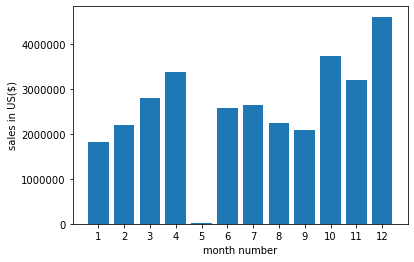

In [62]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months, results['sales'])
plt.xticks(months)
plt.ylabel('sales in US($)')
plt.xlabel('month number')
plt.show()

#### Question 2: What city had the highest number of sales?

In [63]:
results = data.groupby('city').sum()
results

,Quantity Ordered,Price Each,Month,sales
city,,,,
Atlanta-GA,15096.0,2.541933e+06,98136.0,2.556236e+06
Austin-TX,10191.0,1.649961e+06,65633.0,1.658837e+06
Boston-MA,20543.0,3.312526e+06,132112.0,3.333954e+06
Dallas-TX,15115.0,2.487574e+06,97519.0,2.501596e+06
Los Angeles-CA,30403.0,4.924280e+06,195482.0,4.952874e+06
New York City-NY,25376.0,4.201639e+06,164399.0,4.227899e+06
Portland-ME,2509.0,3.893208e+05,16034.0,3.917795e+05
Portland-OR,10236.0,1.688642e+06,65900.0,1.698141e+06
San Francisco-CA,45804.0,7.443433e+06,295910.0,7.489884e+06


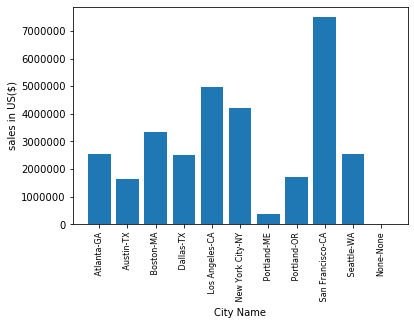

In [65]:
cities = [city for city, df in data.groupby('city')]
plt.bar(cities, results['sales'])
plt.xticks(cities, rotation = 'vertical', size = 8 )
plt.ylabel('sales in US($)')
plt.xlabel('City Name')
plt.show()

#### Question 3: What time should we display advertisements to maximize liklihood of customer's buying product ?

In [66]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA


In [69]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors = 'coerce')

In [70]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA


In [71]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX,8.0,46.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA,22.0,30.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,14.0,38.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,9.0,27.0


In [76]:
results = data.groupby('Hour').sum()
results

,Quantity Ordered,Price Each,Month,sales,Minute
Hour,,,,,
0.0,4041.0,644854.71,25814.0,648883.27,94279.0
1.0,2399.0,416440.51,15641.0,418613.99,56341.0
2.0,1273.0,217395.75,7940.0,218353.31,29736.0
3.0,856.0,132751.03,5586.0,133733.82,21230.0
4.0,853.0,144466.49,5773.0,145018.94,24352.0
5.0,1379.0,207215.09,8781.0,208206.22,39285.0
6.0,2576.0,416671.83,16549.0,419577.48,74019.0
7.0,4155.0,665292.37,27085.0,669306.52,116416.0
8.0,6330.0,1072081.82,40626.0,1077958.69,179104.0


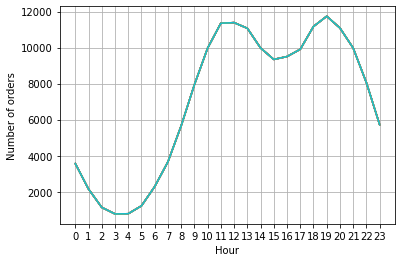

In [74]:
hours = [hour for hour, df in data.groupby('Hour')] #key index
plt.plot(hours, data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

# My recommendation is around 11 am or 7 pm.

#### Question 4: What products are most often sold together ?

In [78]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas-TX,8.0,46.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston-MA,22.0,30.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,14.0,38.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,9.0,27.0


##### See order Id 176560 , have products Google phone, Wired Headphones delivered to the same address. In this way we can check which products are often sold together ..

In [80]:
df = data[data['Order ID'].duplicated(keep = False)] # This will give us the record of repeated order id .
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,14.0,38.0
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,19.0,42.0
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles-CA,19.0,42.0
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston-MA,11.0,31.0
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston-MA,11.0,31.0
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4.0,5.98,San Francisco-CA,17.0,0.0
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4.0,600.00,San Francisco-CA,17.0,0.0
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4.0,14.95,New York City-NY,11.0,7.0
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4.0,11.95,New York City-NY,11.0,7.0


In [81]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

# Grouping the products with same Order ID

<ipython-input-81-fe9ddc098ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,14.0,38.0,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles-CA,14.0,38.0,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles-CA,19.0,42.0,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles-CA,19.0,42.0,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston-MA,11.0,31.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [83]:
# Let's delete the duplicate order id as products are already grouped with same order id
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [86]:
# Now, we need to count the pairs which are occur together in a while ......for thius we will import couple of libraries 
# Counting unique pairs of numbers into a python dictionary 
from itertools import combinations 
from collections import Counter 

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # 2 items together, if we put 3 here it will group together 3 items 
    
for key, value in count.most_common(10):
    print(key, value)
    
# this will help the sellers for selecting better business deals with their primary products.

('Product', 'Product') 51681
('Google Phone', 'USB-C Charging Cable') 896
('iPhone', 'Lightning Charging Cable') 893
('iPhone', 'Wired Headphones') 402
('Google Phone', 'Wired Headphones') 376
('Vareebadd Phone', 'USB-C Charging Cable') 333
('iPhone', 'Apple Airpods Headphones') 330
('Google Phone', 'Bose SoundSport Headphones') 201
('USB-C Charging Cable', 'Wired Headphones') 144
('Vareebadd Phone', 'Wired Headphones') 131


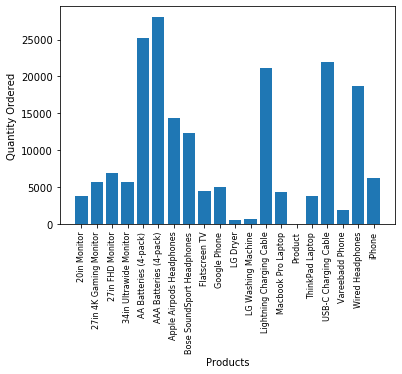

In [87]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()


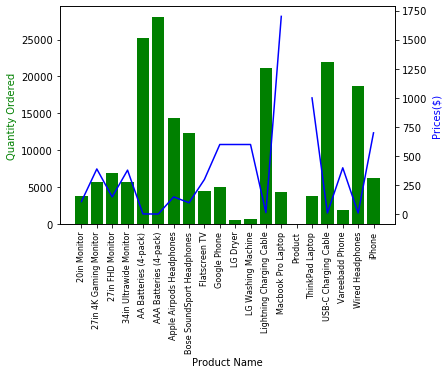

In [92]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()

##### Above graph proves our correlation hypothesis, that is whenever the quantity ordered is high price must be quoted low but charging cables, usb charging sales up even costs more. the reason may be geographically like some area like silicon valley and other educational areas or may be because of technology improvement to good feedback along with branding or may be good business deals affects it's sales which is to be further analyzed ........ 